In [54]:
import pandas as pd
import pydotplus
from IPython.display import Image
from sklearn import tree

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
data = pd.read_csv('/content/drive/My Drive/Kuliah/dataset/stroke.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [57]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['gender'] =  enc.fit_transform(data['gender'] .values)
data['hypertension'] =  enc.fit_transform(data['hypertension'] .values)
data['heart_disease'] =  enc.fit_transform(data['heart_disease'] .values)
data['ever_married'] =  enc.fit_transform(data['ever_married'] .values)
data['work_type'] =  enc.fit_transform(data['work_type'] .values)
data['Residence_type'] =  enc.fit_transform(data['Residence_type'] .values)
data['bmi'] =  enc.fit_transform(data['bmi'] .values)
data['smoking_status'] =  enc.fit_transform(data['smoking_status'] .values)

penyeleksian fitur

In [58]:
df_feature = data.drop('stroke', 1)
sr_outcome = data['stroke']

<ipython-input-58-2ea550c9be3c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_feature = data.drop('stroke', 1)


In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(chi2, k=5)
chi2_selector.fit(df_feature, sr_outcome)

cols = chi2_selector.get_support(indices=True)
df_selected_features = df_feature.iloc[:, cols]

In [60]:
df_selected_features.head()

,id,age,heart_disease,avg_glucose_level,bmi
0,9046,67.0,1,228.69,239
1,51676,61.0,0,202.21,418
2,31112,80.0,1,105.92,198
3,60182,49.0,0,171.23,217
4,1665,79.0,0,174.12,113


In [61]:
from sklearn.feature_selection import RFE

In [62]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [63]:
rfe = RFE(model_rf, n_features_to_select=4, step=1)
fit = rfe.fit(df_feature, sr_outcome)

print("Num Features: %s" % (fit.n_features_))
print("Selectes Features: %s"%(fit.support_))

Num Features: 4
Selectes Features: [ True False  True False False False False False  True  True False]


In [64]:
df_selected_features = df_feature.iloc[:,fit.support_]
df_selected_features.head()

,id,age,avg_glucose_level,bmi
0,9046,67.0,228.69,239
1,51676,61.0,202.21,418
2,31112,80.0,105.92,198
3,60182,49.0,171.23,217
4,1665,79.0,174.12,113


In [65]:
atr_data = data.drop(columns='stroke')
atr_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.0,0,1,1,2,1,228.69,239,1
1,51676,0,61.0,0,0,1,3,0,202.21,418,2
2,31112,1,80.0,0,1,1,2,0,105.92,198,2
3,60182,0,49.0,0,0,1,2,1,171.23,217,3
4,1665,0,79.0,1,0,1,3,0,174.12,113,2


In [66]:
cls_data = data['stroke']
cls_data.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [72]:
X_train, X_test, y_train, y_test = train_test_split(atr_data, cls_data, test_size = 0.2, random_state=0)
tree_data = DecisionTreeClassifier(random_state=0)
tree_data.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [73]:
print ('Nilai Akurasi: ',tree_data.score(X_train, y_train))

Nilai Akurasi:  1.0


In [70]:
from sklearn.tree import export_graphviz
export_graphviz(tree_data, out_file='tree_stroke.dot', class_names=["1", "0"], feature_names=atr_data.columns, impurity=False, filled=True)

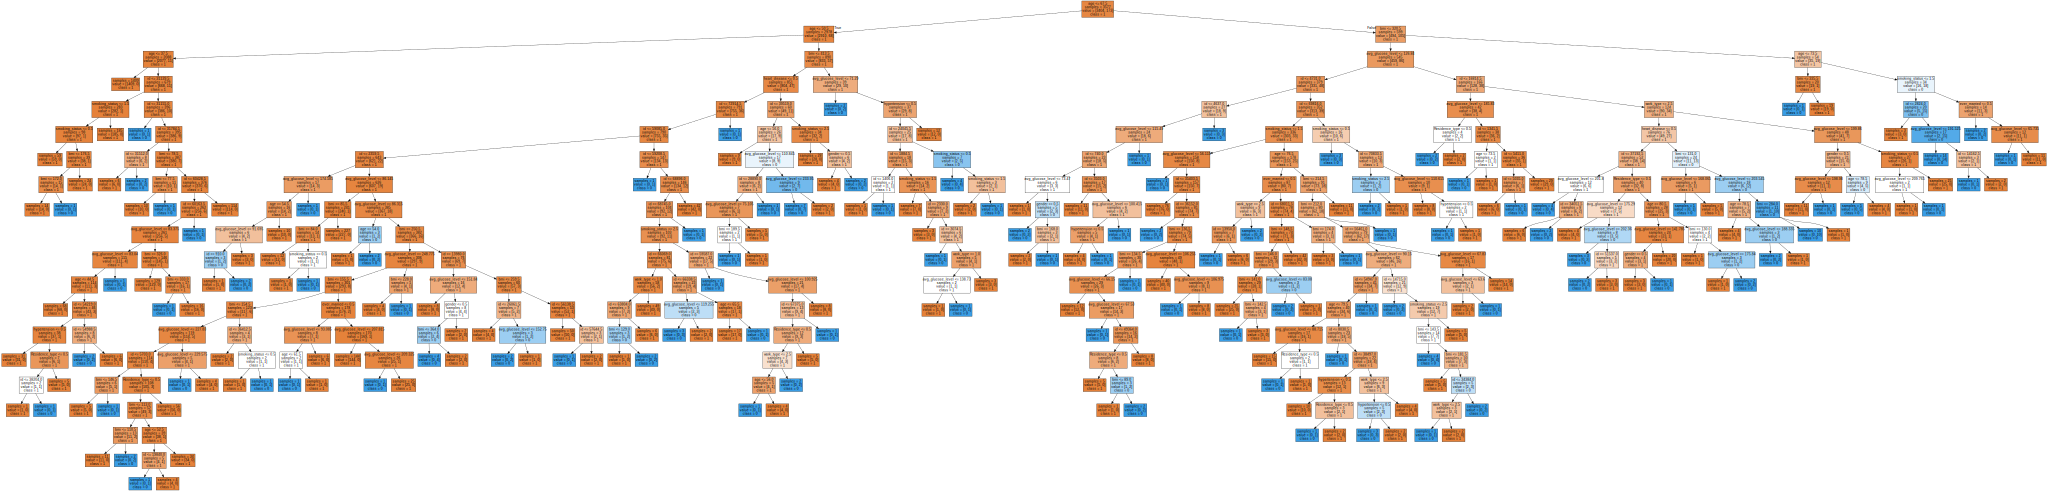

In [71]:
import graphviz
from sklearn.tree import export_graphviz
with open('tree_stroke.dot') as fig:
  dot_graph = fig.read()
graphviz.Source(dot_graph)